In [1]:
import pandas as pd
import warnings
import numpy as np
import pickle
import sys
import os

In [2]:
sys.path.append(os.path.abspath('../scripts'))

In [ ]:
from forcasting_models import (train_arima, train_sarima, train_lstm, forecast_lstm, evaluate_forecast,forecast_arima,
                               download_data,plot_arima_forecast,plot_sarima_forecast,plot_lstm_forecast)

In [ ]:

tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'

In [5]:
data = download_data(tickers, start_date, end_date)


[*********************100%***********************]  3 of 3 completed


In [6]:

data.index = pd.to_datetime(data.index)  

train_data = data.loc[:'2022']

test_data = data.loc['2023':]

train_data_tsla = train_data['TSLA']

test_data_tsla = test_data['TSLA']


In [7]:


warnings.filterwarnings("ignore", message="No supported index is available")
train_data_tsla.index = pd.to_datetime(train_data_tsla.index)
test_data_tsla.index = pd.to_datetime(test_data_tsla.index)
arima_model = train_arima(train_data_tsla, order=(1, 1, 1))

c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_11\Time-Series-Forecasting-for-Portfolio-Management-Optimization-\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_11\Time-Series-Forecasting-for-Portfolio-Management-Optimization-\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_11\Time-Series-Forecasting-for-Portfolio-Management-Optimization-\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored

In [8]:

arima_forecast = arima_model.get_forecast(steps=len(test_data_tsla)).predicted_mean
arima_forecast.index = test_data.index  

In [9]:
print("ARIMA Evaluation:", evaluate_forecast(test_data_tsla, arima_forecast))
print("First few rows of the forecast:")
print(arima_forecast.head())

ARIMA Evaluation: {'MAE': np.float64(2.6348590498988087), 'RMSE': 3.2087344971064935, 'MAPE': np.float64(3.6819104252640145)}
First few rows of the forecast:
Date
2023-01-03 00:00:00+00:00    67.771161
2023-01-04 00:00:00+00:00    67.781596
2023-01-05 00:00:00+00:00    67.788510
2023-01-06 00:00:00+00:00    67.793090
2023-01-09 00:00:00+00:00    67.796124
Name: predicted_mean, dtype: float64


In [10]:

sarima_model = train_sarima(train_data_tsla, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_predictions = sarima_model.forecast(steps=len(test_data_tsla))

c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_11\Time-Series-Forecasting-for-Portfolio-Management-Optimization-\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_11\Time-Series-Forecasting-for-Portfolio-Management-Optimization-\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
print("SARIMA Evaluation:", evaluate_forecast(test_data_tsla, sarima_predictions))


SARIMA Evaluation: {'MAE': np.float64(3.495106264860161), 'RMSE': 4.261148000685457, 'MAPE': np.float64(4.881454676008821)}


In [12]:

lstm_model, n_steps = train_lstm(train_data_tsla.values, n_steps=50)
lstm_predictions = forecast_lstm(lstm_model, test_data_tsla.values, n_steps=n_steps)
print("LSTM Evaluation:", evaluate_forecast(test_data_tsla.values[n_steps:], lstm_predictions))

Epoch 1/20


c:\Users\ftesfaye\Desktop\KIFIYA\KIFIYA_PROJECT_WEEK_11\Time-Series-Forecasting-for-Portfolio-Management-Optimization-\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 88281.1719
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 172912.4531
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 53636.6992
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15943.3516
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5378.0840
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1501.1096
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1607.0745
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 389.6168
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 139.9822
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 128.7679
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 161.3222
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 136.6704
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 76.9796
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 316.1168
Epoch 15/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss

In [13]:
# Save ARIMA model
with open('arima_model.pkl', 'wb') as file:
    pickle.dump(arima_model, file)

# Save SARIMA model
with open('sarima_model.pkl', 'wb') as file:
    pickle.dump(sarima_model, file)

# Save LSTM model
with open('lstm_model.pkl', 'wb') as file:
    pickle.dump(lstm_model, file)

In [15]:
# Evaluation
print("ARIMA Evaluation:",  evaluate_forecast(test_data_tsla, arima_forecast))
print("SARIMA Evaluation:", evaluate_forecast(test_data_tsla, sarima_predictions))
print("LSTM Evaluation:", evaluate_forecast(test_data_tsla.values[n_steps:], lstm_predictions))

ARIMA Evaluation: {'MAE': np.float64(2.6348590498988087), 'RMSE': 3.2087344971064935, 'MAPE': np.float64(3.6819104252640145)}
SARIMA Evaluation: {'MAE': np.float64(3.495106264860161), 'RMSE': 4.261148000685457, 'MAPE': np.float64(4.881454676008821)}
LSTM Evaluation: {'MAE': np.float64(19.32984620552601), 'RMSE': 27.83453813240092, 'MAPE': np.float64(27.36144989568118)}


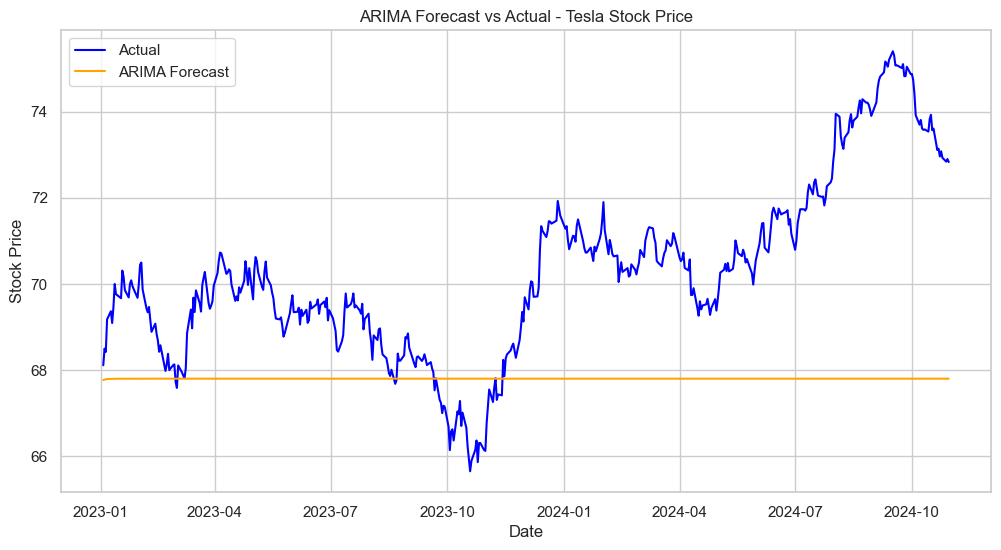

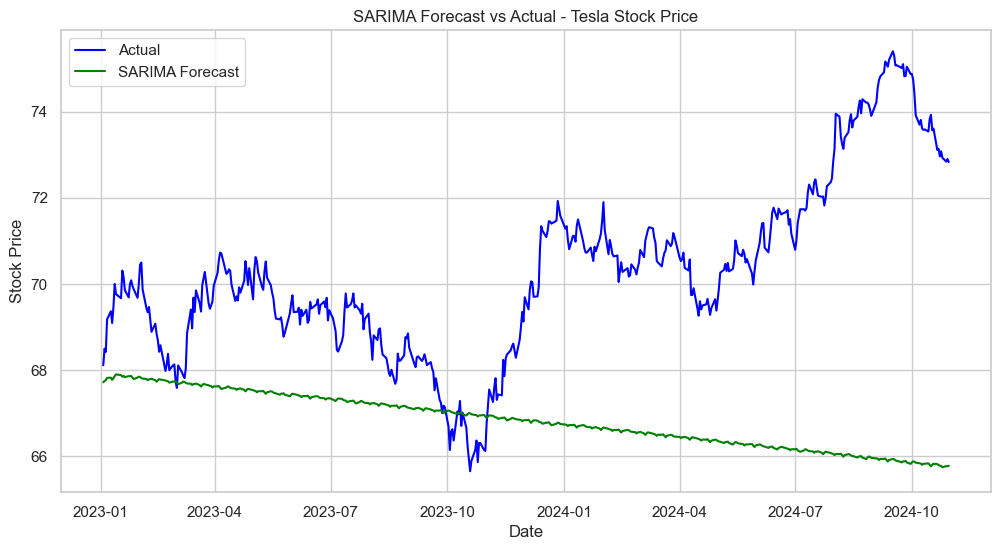

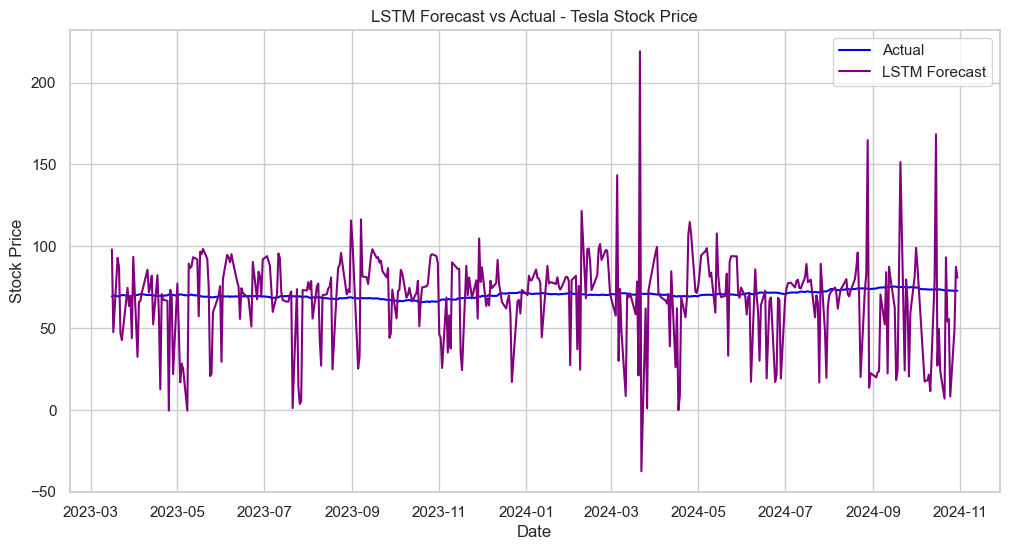

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# ARIMA Forecast Plot
plt.figure(figsize=(12, 6))
plt.plot(test_data_tsla.index, test_data_tsla, label="Actual", color="blue")
plt.plot(arima_forecast.index, arima_forecast, label="ARIMA Forecast", color="orange")
plt.title("ARIMA Forecast vs Actual - Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# SARIMA Forecast Plot
plt.figure(figsize=(12, 6))
plt.plot(test_data_tsla.index, test_data_tsla, label="Actual", color="blue")
plt.plot(test_data_tsla.index, sarima_predictions, label="SARIMA Forecast", color="green")
plt.title("SARIMA Forecast vs Actual - Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# LSTM Forecast Plot
plt.figure(figsize=(12, 6))
plt.plot(test_data_tsla.index[n_steps:], test_data_tsla.values[n_steps:], label="Actual", color="blue")
plt.plot(test_data_tsla.index[n_steps:], lstm_predictions, label="LSTM Forecast", color="purple")
plt.title("LSTM Forecast vs Actual - Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
